In [187]:
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime
import numpy as np

In [188]:
all_df = pd.read_json('https://retail-sales-data.herokuapp.com/alldata')

In [189]:
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02-28,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02-20,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12-16,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08-16,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08-07,92814475704,80202.0


In [190]:
all_df['tran_date'] = pd.to_datetime(all_df['tran_date'], format='%Y-%m-%d')
all_df['tran_date'] = all_df['tran_date'].dt.strftime('%Y-%m')
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08,92814475704,80202.0


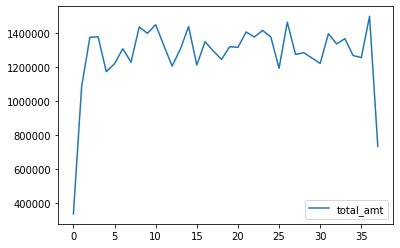

In [191]:
total_rev_df = all_df[['tran_date', 'total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
total_rev_df.plot()

In [196]:
# df = all_df.loc[(all_df['Store_type'] == 'e-Shop') & (all_df['Qty'] > 0) & (all_df['prod_cat'] == 'Clothing') & (all_df['prod_subcat'] == 'Kids'), ['tran_date', 'total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
# df = all_df.loc[(all_df['Store_type'] == 'e-Shop') & (all_df['prod_cat'] == 'Clothing') & (all_df['prod_subcat'] == 'Mens'), ['tran_date', 'total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
df = all_df.loc[(all_df['Store_type'] == 'e-Shop'), ['tran_date', 'total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
df.head()

,tran_date,total_amt
0,2011-01,132977.91
1,2011-02,505537.50
2,2011-03,624342.68
3,2011-04,559101.27
4,2011-05,492381.37


In [197]:
# df = df[df['total_amt'] > 0]
# df = df.loc[:,['tran_date','total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
# df.head()

In [198]:
# eshop_df['tran_date'] = to_datetime(eshop_df['tran_date'])
# # eshop_df['tran_date'] = eshop_df['tran_date'].dt.to_period('M')
# eshop_df.head()
# eshop_df['ds'] = eshop_df.index
df.dtypes

tran_date     object
total_amt    float64
dtype: object

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds           yhat     yhat_lower     yhat_upper
0 2014-01-01  512261.717833  429599.214103  601080.134308
1 2014-02-01  485312.501164  403560.564865  574008.564966
2 2014-03-01  639637.564641  549838.388458  731784.352835
3 2014-04-01  560993.435421  470045.759332  648317.444808
4 2014-05-01  520402.878561  429678.472343  607131.813524


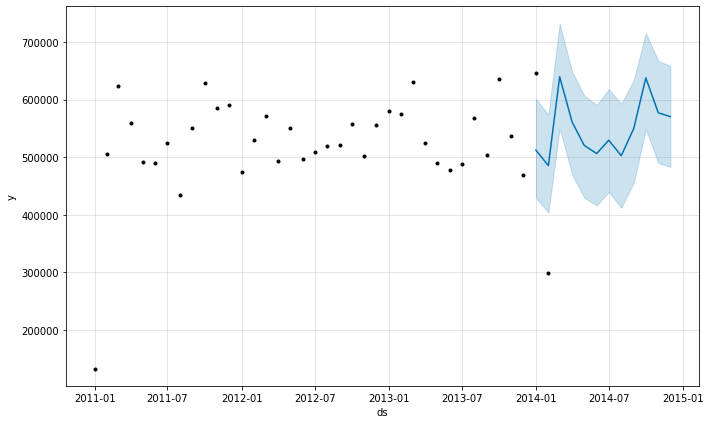

In [200]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2014-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


           ds          y
21 2012-10-01  12422.410
22 2012-11-01  41471.755
23 2012-12-01  33641.725
24 2013-01-01  19952.985
25 2013-02-01  39196.560


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


MAE: 9226.097


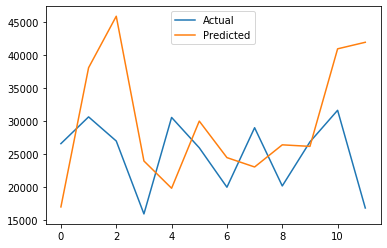

In [170]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2013-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()